# Homogeneous deformation

Often described as deformation during which lines remain as lines and parallel lines remain parallel. Homogeneous deformation could be described as **affine transformation** of initial coordinates

$$\begin{align*}x &= aX+bY+t_X \\ y &= cX+dY+t_Y \end{align*}$$

or in matrix form using homogeneous coordinates:

$$ \begin{bmatrix} x \\ y \\ 1 \end{bmatrix}=\begin{bmatrix} a & b & t_X \\ c & d & t_Y \\ 0 & 0 & 1 \end{bmatrix}\begin{bmatrix}X \\ Y \\ 1 \end{bmatrix}$$

**Properties of homogeneous deformation are not spatially dependent**

## Deformation gradient

Without translation the homogeneous deformation (rotation and strain) could be described as:

$$\begin{align*}x &= aX+bY \\ y &= cX+dY \end{align*}$$

$$ \begin{bmatrix}x \\ y\end{bmatrix}=\begin{bmatrix} a & b \\ c & d \end{bmatrix}\begin{bmatrix}X \\ Y\end{bmatrix}$$

or im matrix form

$$x=\mathbf{F}X$$

where $ \mathbf{F} $ is so called **deformation gradient**.

Note, that as we excluded translation, the origin of coordinates do not change during deformation:

$$ \begin{bmatrix} 0 \\ 0  \end{bmatrix}=\mathbf{F}\begin{bmatrix} 0 \\ 0  \end{bmatrix} $$

## Displacement gradient

Displacement of particle is vector between initial and final postion, i.e:

\begin{align*}u &= x-X = aX+bY-X = (a-1)X+bY\\ v &= y-Y = cX+dY-Y = cX+(d-1)Y\end{align*}

$$ \begin{bmatrix}u \\ v\end{bmatrix}=\begin{bmatrix} a-1 & b \\ c & d-1 \end{bmatrix}\begin{bmatrix}X \\ Y\end{bmatrix}$$

or

$$u=(\mathbf{F}-\mathbf{I})X=\mathbf{\nabla u}X$$

where $\mathbf{\nabla u}$ is so called **displacement gradient**.

What do you think corresponds to symmetric $  \cfrac{1}{2}(\mathbf{\nabla u} + \mathbf{\nabla u}^T) $ and antisymmetric $ \cfrac{1}{2}(\mathbf{\nabla u} - \mathbf{\nabla u}^T) $ part of the displacement gradient matrix?

## Let's Python it

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Lets try to visualize how unit circle deforms during homogeneous deformation:

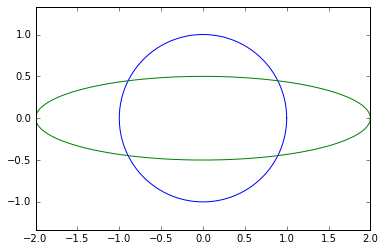

In [2]:
# parametric definition of unit circle
theta = linspace(0,2*pi,300)
X = cos(theta)
Y = sin(theta)
plot(X, Y)
axis('equal')

# Apply deformation gradient
F = array([[2,0],[0,0.5]])
x,y = dot(F, [X,Y])
plot(x,y)

To visualize deformation gradient $\mathbf{F}$ we have to calculate displacement for points on regular grid and plot it using command `quiver`.

(-3.0, 3.0, -2.0, 2.0)

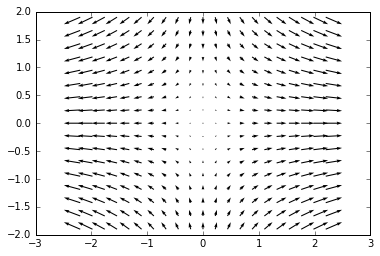

In [3]:
# create rectangular grid
xgrid = linspace(-2.2, 2.2, 21)
ygrid = linspace(-1.9, 1.9, 17)
X,Y = meshgrid(xgrid, ygrid)

# calculate new positions
x = F[0,0]*X + F[0,1]*Y
y = F[1,0]*X + F[1,1]*Y

# plot
quiver(X, Y, x-X, y-Y, angles='xy')
axis('equal')

We can also calculate displacements directly using displacement gradient $\mathbf{\nabla u}$:

(-3.0, 3.0, -2.0, 2.0)

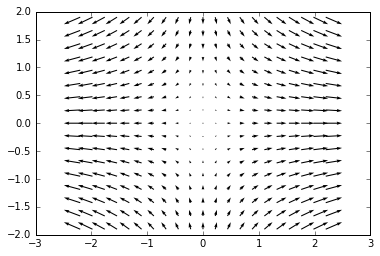

In [4]:
# calculate displacements
J = F - eye(2)
u = J[0,0]*X + J[0,1]*Y
v = J[1,0]*X + J[1,1]*Y

# plot
quiver(X, Y, u, v, angles='xy')
axis('equal')

## Strain ellipse

According to definition, the **strain ellipse** results from transformation (homogeneous deformation) of unit circle. Equation of unit circle in matrix form is:

$$\begin{bmatrix}X & Y\end{bmatrix}\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}\begin{bmatrix}X \\ Y\end{bmatrix}=1$$

or

$$X^T\mathbf{I}X=1$$

The deformation gradient equation could be written in terms of deformed coordinates as:

$$X=\mathbf{F}^{-1}x$$

Substituting into equation of unit circle we obtain:

$$x^T(\mathbf{F}^{-1})^T\mathbf{I}\mathbf{F}^{-1}x=x^T(\mathbf{F}^{-1})^T\mathbf{F}^{-1}x=x^T\mathbf{E}x=1$$

where matrix $\mathbf{E}$ represents ellipse or ellipsoid and is commonly called **ellipsoid tensor** or **Cauchy's deformation tensor**.

The inverse of ellipsoid tensor $\mathbf{E}$ is called **Finger tensor** or **left Cauchy-Green tensor**:

$$\mathbf{C}=(\mathbf{E})^{-1}=((\mathbf{F}^{-1})^T\mathbf{F}^{-1})^{-1}=\mathbf{F}\mathbf{F}^T$$

The eigenvectors of $\mathbf{C}$ define orientation of principal axes of the **strain ellipse/ellipsiod**. The eigenvalues are quadratic elogations along principal directions, i.e. the lengths of semi-axes of the strain ellipse or ellipsoid are the square roots of the corresponding eigenvalues of $\mathbf{C}$.

So in Python, to calculate orientation and axial ratio of strain ellipse for deformation gradient $\mathbf{F}$, we can use following code:

In [5]:
# deformation gradient
F = array([[1,1],[0,1]])
# calculate left Cauchy-Green tensor
C = dot(F,F.T)
s,U = eig(C)
# identify long and short axis
a = s.argmax()
b = s.argmin()
# calculate axial ratio and orientation
ar = sqrt(s[a]/s[b])
ori = rad2deg(arccos(U[0,0]))
print('Orientation: {}\nAxial ratio: {}'.format(ori,ar))

Orientation: 31.71747441146101
Axial ratio: 2.618033988749895


In [6]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./css/sg2.css", "r").read()
    return HTML(styles)
css_styling()